In [1]:
%autosave 300

Autosaving every 300 seconds


# imports

In [2]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

from jupyterthemes import jtplot
jtplot.style()

# data

In [3]:
boston = load_boston()

X, y = boston.data, boston.target
n_features = X.shape[1]

# algorithm

In [4]:
reg = GradientBoostingRegressor(n_estimators=50)

# optimizer

In [10]:
space = [
    Integer(1, 5, name='max_depth'),
    Real(1e-5, 1, 'log_uniform', name='learning_rate'),
    Integer(1, n_features, name='max_features'),
    Integer(2, 100, name='min_samples_split'),
    Integer(1, 100, name='min_samples_leaf')
]

In [11]:
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    
    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error'))

In [12]:
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

In [13]:
print('best score: ', res_gp.fun)

best score:  2.862888798586192


In [14]:
print('max_depth: ', res_gp.x[0])
print('learning_rate: ', res_gp.x[1])
print('max_features: ', res_gp.x[2])
print('min_samples_split: ', res_gp.x[3])
print('min_samples_leaf: ', res_gp.x[4])

max_depth:  5
learning_rate:  0.10693488939216785
max_features:  10
min_samples_split:  30
min_samples_leaf:  1


In [13]:
print('best score: ', res_gp.fun)

best score:  2.8782845649945155


In [14]:
print('max_depth: ', res_gp.x[0])
print('learning_rate: ', res_gp.x[1])
print('max_features: ', res_gp.x[2])
print('min_samples_split: ', res_gp.x[3])
print('min_samples_leaf: ', res_gp.x[4])

max_depth:  2
learning_rate:  0.17213507463555563
max_features:  13
min_samples_split:  2
min_samples_leaf:  1


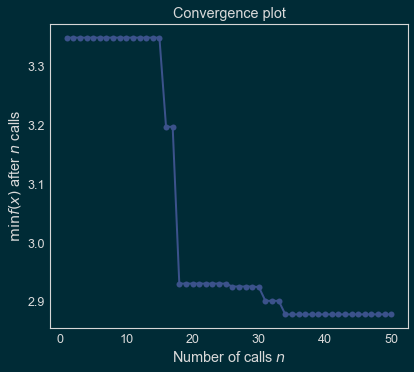

In [23]:
plot_convergence(res_gp)